Рассмотрим основные моменты не вошедшие в предыдущие лекции

Обновим и подключим библиотеки:

In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

     |████████████████████████████████| 1.5MB 1.2MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 7.3 MB 9.5 kB/s eta 0:00:01     |██████████████████████████████▏ | 6.9 MB 9.8 MB/s eta 0:00:01
ERROR: azureml-train-automl 1.0.72 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.23.0 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.23.0 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Импортируем датасет MNIST.

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step


Объем тренировочного набора данных:

In [4]:
len(X_train)

60000

Посмотрим, что из себя представляет, например, нулевой объект.

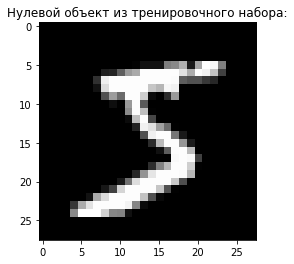

In [5]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [6]:
y_train[0]

5

Для разделения данных рекомендуем использовать функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)

Для начала преобразуем данные в привычный формат.

In [8]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

Уменьшим размерность тестовых данных, выбрав 48 главных компонент

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=48, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Обучаем модель:

In [11]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [12]:
X_test = modelPCA.transform(X_test)

In [13]:
y_pred = clf.predict(X_test)

Выполняем оценку:

In [14]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [15]:
CM

array([[1618,    0,    8,   10,    3,   17,   26,    1,    7,    3],
       [   0, 2018,   15,    9,    2,    6,    6,    2,   13,    4],
       [  15,    9, 1611,   26,   14,    9,   10,   17,   43,    9],
       [   6,    2,   34, 1664,    3,   57,   10,   25,   51,   21],
       [   5,   15,   15,    1, 1593,   11,   22,   10,   18,   66],
       [  14,    2,   11,   46,   19, 1422,   30,   11,   23,   13],
       [  13,    4,   11,    5,    5,   30, 1687,    0,   10,    1],
       [   9,   14,   27,    1,   34,    0,    1, 1720,    9,   71],
       [  21,   23,   18,   61,   14,   58,   12,   11, 1530,   25],
       [   9,    9,   13,   25,   81,   21,    4,   38,   27, 1597]])

Число верно классифицирвоанных объектов класс 0

In [16]:
CM[0][0]

1618

Число объектов класс 0 отнесенных к классу 8

In [17]:
CM[0][8]

7